# Zillow Data EDA

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in Data

# all the properties with their home features for 2016. 
properties1 = pd.read_csv('properties_2016.csv', header=0)

# the training set with transactions from 1/1/2016 to 12/31/2016
train1 = pd.read_csv('train_2016_v2.csv', header=0)

In [3]:
properties1.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
train1.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [9]:
# Read in the shapes of the data
print(train1.shape)
print(train2.shape)
print(properties1.shape)
print(properties2.shape)

(90275, 3)
(77613, 3)
(2985217, 58)
(2985217, 58)


In [7]:
# make 2016 merged data
data = pd.merge(train1, properties1, how = 'left', on = 'parcelid')

print(data.shape)

(90275, 60)


In [8]:
data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


## Data Cleaning

### Data Types

In [9]:
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Variable", "Column Type"]
dtype_df

,Variable,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,object
3,airconditioningtypeid,float64
4,architecturalstyletypeid,float64
5,basementsqft,float64
6,bathroomcnt,float64
7,bedroomcnt,float64
8,buildingclasstypeid,float64
9,buildingqualitytypeid,float64


In [10]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Variable
0,int64,1
1,float64,53
2,object,6


### Missing Values

In [11]:
# Calcuate Missing Percentages

na_df = data.isna().sum(axis=0).sort_values(ascending = False).reset_index()
na_df.columns = ['Variable', 'Count']
na_df['Ratio'] = na_df['Count']/len(data)
#pd.DataFrame(na_df).head(10)
na_df[na_df['Ratio']>0.90]

,Variable,Count,Ratio
0,buildingclasstypeid,90259,0.999823
1,finishedsquarefeet13,90242,0.999634
2,storytypeid,90232,0.999524
3,basementsqft,90232,0.999524
4,yardbuildingsqft26,90180,0.998948
5,fireplaceflag,90053,0.997541
6,architecturalstyletypeid,90014,0.997109
7,typeconstructiontypeid,89976,0.996688
8,finishedsquarefeet6,89854,0.995336
9,decktypeid,89617,0.992711


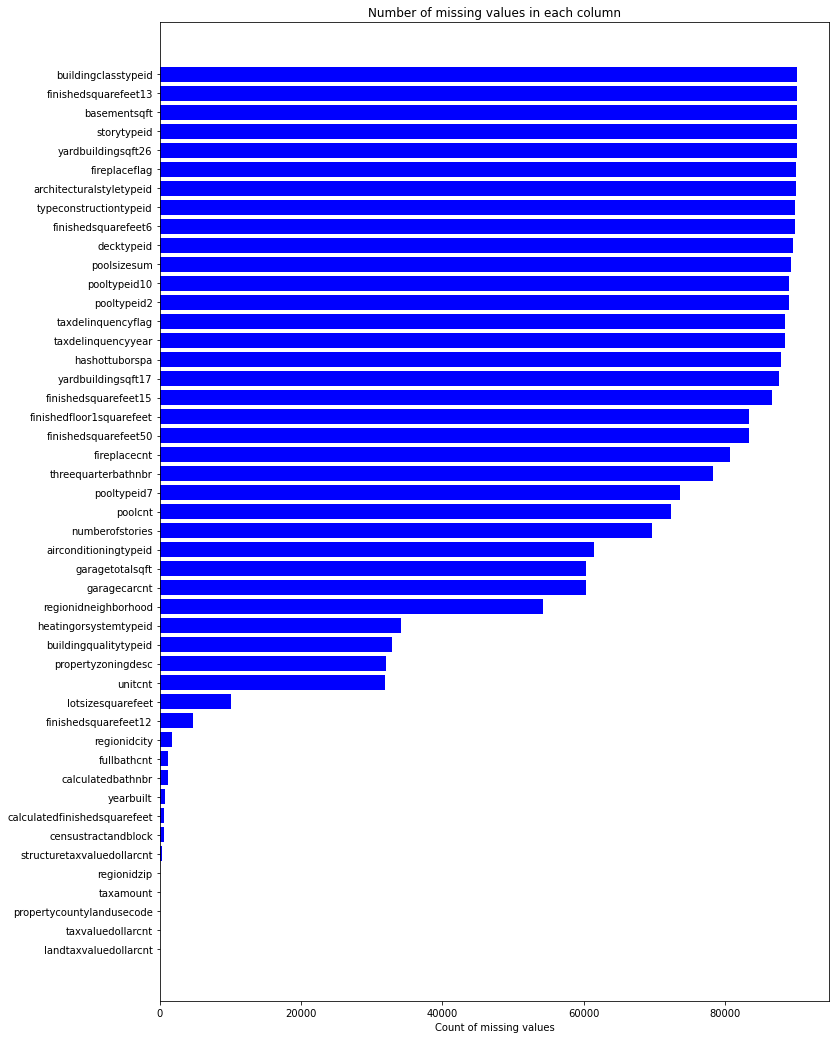

In [12]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

### If a variable has more than 90% missing data, we are going to drop these. It will be difficult to be able to predict those values. 

In [13]:
drop_var = na_df[na_df['Ratio'] > .90]
drop_var_types = pd.merge(dtype_df, drop_var, on=['Variable', 'Variable'], how='inner')
drop_var_types = drop_var_types.iloc[:,0:2]
drop_var_types

,Variable,Column Type
0,architecturalstyletypeid,float64
1,basementsqft,float64
2,buildingclasstypeid,float64
3,decktypeid,float64
4,finishedfloor1squarefeet,float64
5,finishedsquarefeet13,float64
6,finishedsquarefeet15,float64
7,finishedsquarefeet50,float64
8,finishedsquarefeet6,float64
9,hashottuborspa,object


In [14]:
drop_var_types.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Variable
0,float64,17
1,object,3


Based on above, we see we have 3 object variables that had more than 90% missing data and 17 float64 variables. The 3 object variables are fireplaceflg, taxdelinquencyflag, and hashottuborspa. If we further investigate these three variables we see:

In [15]:
print(data['fireplaceflag'].unique())
print(data['taxdelinquencyflag'].unique())
print(data['hashottuborspa'].unique())

[nan True]
[nan 'Y']
[nan True]


If one of these three variable has an 'NA' that means that they do not have this feature in their house. Because of this, we can see that the NA value has significant meaning. Therefore, we will leave these variables in the dataset, but change the flag to be 1 and 0, meaning 1 has the flag and 0 does not. Then, we will drop the remaining 17 float variables from the dataset. 

In [16]:
data["fireplaceflag"] = data["fireplaceflag"].fillna(0)
data['taxdelinquencyflag'] = data['taxdelinquencyflag'].fillna(0)
data['hashottuborspa'] = data['hashottuborspa'].fillna(0)

In [17]:
data['fireplaceflag'].replace({True:1}, inplace=True)
data['taxdelinquencyflag'].replace({"Y": 1}, inplace=True)
data['hashottuborspa'].replace({True:1}, inplace=True)

In [18]:
drop_floats = drop_var_types[drop_var_types['Column Type']=='float64']
drop_floats = list(drop_floats['Variable'])
data = data.drop(columns=drop_floats)
data.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,1684.0,1684.0,...,1959.0,NaN,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,3.5,2263.0,2263.0,...,2014.0,NaN,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,NaN
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,2217.0,2217.0,...,1940.0,NaN,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,839.0,839.0,...,1987.0,NaN,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2.5,2283.0,2283.0,...,1981.0,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,6.059042e+13


In [19]:
data.shape

(90275, 43)

### Continue looking at NA Values

In [20]:
na_ratio = data.isna().sum().sort_values(ascending = False)/len(data)
na_cols = na_ratio[na_ratio>0].index


# ends with 'cnt'
na_cnt = na_cols[na_cols.str.endswith('cnt')]
na_others = na_cols[~na_cols.str.endswith('cnt')]
print(na_cnt)
print('\n')
print(na_others)

Index(['fireplacecnt', 'poolcnt', 'garagecarcnt', 'unitcnt', 'fullbathcnt',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt',
       'taxvaluedollarcnt'],
      dtype='object')


Index(['threequarterbathnbr', 'pooltypeid7', 'numberofstories',
       'airconditioningtypeid', 'garagetotalsqft', 'regionidneighborhood',
       'heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc',
       'lotsizesquarefeet', 'finishedsquarefeet12', 'regionidcity',
       'calculatedbathnbr', 'yearbuilt', 'calculatedfinishedsquarefeet',
       'censustractandblock', 'regionidzip', 'taxamount',
       'propertycountylandusecode'],
      dtype='object')


In [21]:
# For the the variables shown above, we can replace the NA variables with the median for each respective variable

data[na_cnt] = data[na_cnt].fillna(data[na_cnt].median())
data[na_others] = data[na_others].fillna(data[na_others].median())

In [22]:
# Check if there are anymore NA values
na_ratio = data.isna().sum().sort_values(ascending = False)/len(data)
na_ratio[na_ratio>0]

propertyzoningdesc           0.354052
propertycountylandusecode    0.000011
dtype: float64

In [23]:
print(data['propertyzoningdesc'].dtypes)
print(data['propertycountylandusecode'].dtypes)

object
object


Because both of the variables above are object, we were not able to put in median values for these. But because these variables do not have an overwhelming amount of NA values we will leave them. 

Next, we will consider variables with only 1 value throughout the entire dataset. These values would show to have zero purpose if all the values are the same. Hence, we will drop them

In [24]:
one_val = data.columns[data.nunique()==1]
data.drop(one_val, axis = 1, inplace = True)

Lastly, we will consider the transaction date variable. This was originally an object variable, but we will convert it to a date time variable instead

In [25]:
data['transactiondate'] = pd.to_datetime(data['transactiondate'], format = '%Y-%m-%d')
data['transactiondate']

0       2016-01-01
1       2016-01-01
2       2016-01-01
3       2016-01-02
4       2016-01-02
           ...    
90270   2016-12-30
90271   2016-12-30
90272   2016-12-30
90273   2016-12-30
90274   2016-12-30
Name: transactiondate, Length: 90275, dtype: datetime64[ns]

After cleaning our data, we are left with 41 variables only two of which have missing values.

In [26]:
print(data.shape)
print(data.isna().sum())

(90275, 40)
parcelid                            0
logerror                            0
transactiondate                     0
airconditioningtypeid               0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedbathnbr                   0
calculatedfinishedsquarefeet        0
finishedsquarefeet12                0
fips                                0
fireplacecnt                        0
fullbathcnt                         0
garagecarcnt                        0
garagetotalsqft                     0
hashottuborspa                      0
heatingorsystemtypeid               0
latitude                            0
longitude                           0
lotsizesquarefeet                   0
propertycountylandusecode           1
propertylandusetypeid               0
propertyzoningdesc              31962
rawcensustractandblock              0
regionidcity                        0
regionidcounty                      0


## EDA

Let's beging to explore the different variables in our data set. We will start with our target variable: logerror.

#### Log Error

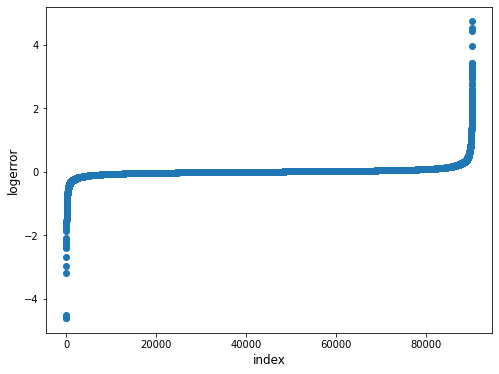

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(range(data.shape[0]), np.sort(data.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

From the graph above we can see that we definitely have some outliers in the dataset. For now, we will leave these in the dataset until we see a reason to remove them. 

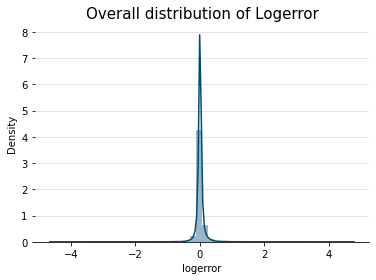

In [28]:
ax = plt.subplot(1,1,1)
sns.distplot(data['logerror'], color = '#004c70')
plt.title('Overall distribution of Logerror', fontsize = 15)

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

#### Transaction Data

Next, let's look at transaction dates. We can see that we do not have much data for the later months of the year. This makes sense as the test data we have was from October to December and we have less test data than training data. 

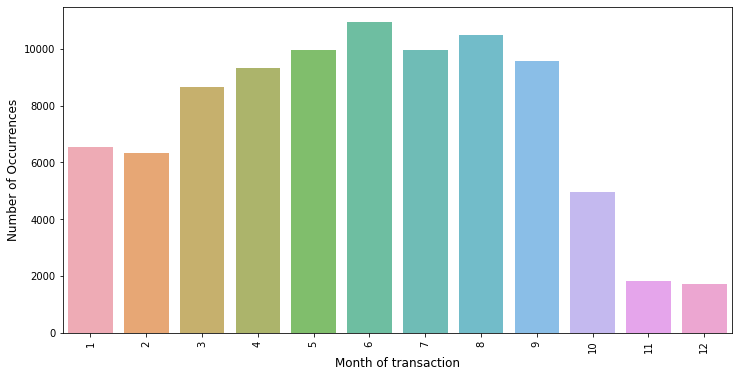

In [29]:
data['transaction_month'] = data['transactiondate'].dt.month

cnt_srs = data['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

#### Parcel ID

Luckily, the majority of the pacrel ids only appear once. Although, some appear twice whuich means there are multiple values and features of these homes. These could be due to them being put back on the market in a short amount of time.

In [30]:
(data['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

#### Latitude and Longitude

In the graph below I visualized regions included in zillow data using latitude and longitude. When plotting regions with those two coordinates, longitude corresponds to x-axis, and latitude corresponds to y-axis.

<Figure size 864x864 with 0 Axes>

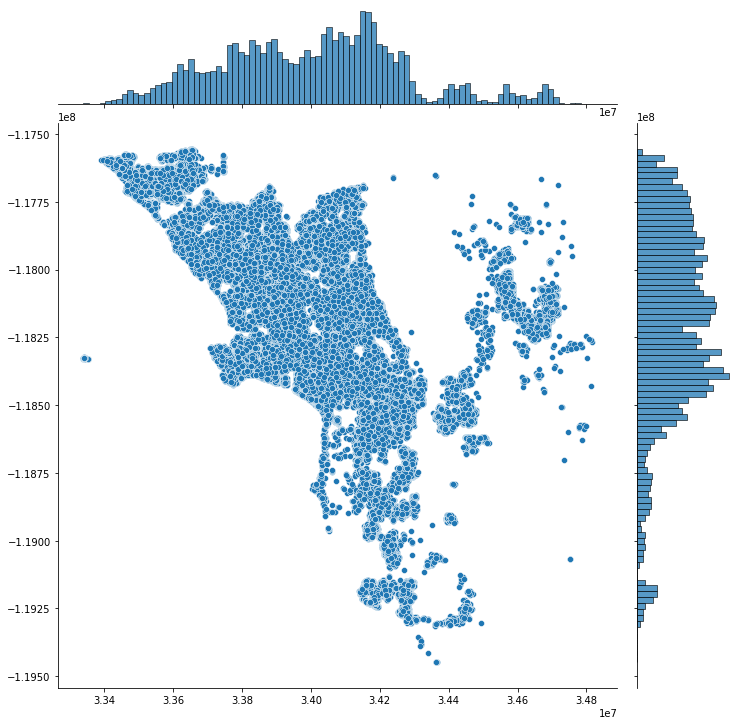

In [31]:
plt.figure(figsize=(12,12))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

Additionaly, I plotted 3 counties with different colors. (Colors: Ventura - red, LA - grey, Orange - blue)
Plus, county denotes specific regions, so it's better to convert those variable into categorical variable!

In [32]:
# convert to categorical variable
new_cat = []
for value in data['regionidcounty'].values:
    if value == 1286:
        new_cat.append('Orange')
    elif value == 2061:
        new_cat.append('Ventura')
    else:
        new_cat.append('LA')

data['regionidcounty'] = new_cat

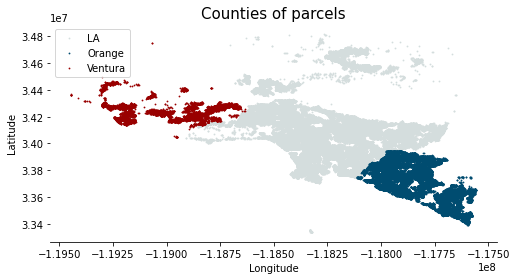

In [34]:
# county
colors = ['#d4dddd','#004c70', '#990000'] # originally 3, but includes NA values

plt.figure(figsize = (8,4))
ax = plt.subplot(1,1,1)
for i, c in enumerate(data['regionidcounty'].unique()):
    df = data[data['regionidcounty']==c]
    plt.plot(df['longitude'], df['latitude'], 'o', markersize = 0.8, color = colors[i], label = c)
plt.xlabel('Longitude'); plt.ylabel('Latitude'); plt.title('Counties of parcels', fontsize = 15); plt.legend(loc = 'best')
    
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

#### Year Built

From the graphs shown below we can see that most of residences were built between the 1950s-1980s. In addition, we can see that the mean logerror is large for residences that were built a long time ago(1824 ~ 1900). Recently built residences have smaller logerrors compared to old ones.

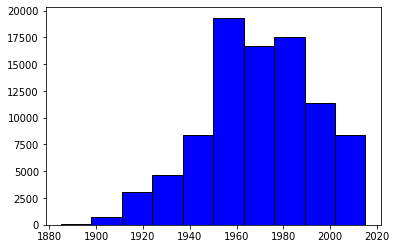

In [35]:
plt.hist(data['yearbuilt'], color = 'blue', edgecolor = 'black')
plt.show()

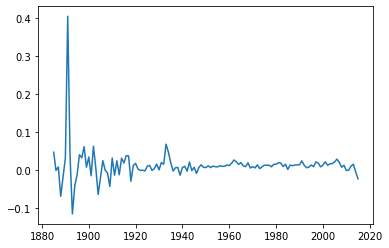

In [36]:
yearbuilt = data.groupby(['yearbuilt'])['logerror'].mean().reset_index()
plt.plot(yearbuilt['yearbuilt'], yearbuilt['logerror']) 

#### Correlation with LogError

According to this heatmap, important variables are finishedsquarefeet12, calcuatedfinishedsquarefeet, calculatedbathnbr, bedroomcnt, fullbathcnt, bathroomcnt.

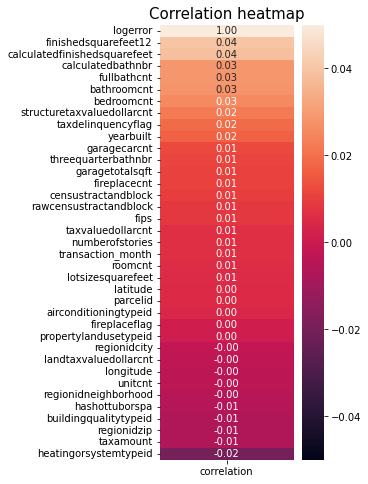

In [37]:
corr = pd.DataFrame(data.corr()['logerror'].sort_values(ascending = False)).rename(columns = {'logerror':'correlation'})

plt.figure(figsize = (3,8))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.05, vmax = 0.05)
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

Let's look at the first two variables: finishedsquarefeet12 and calculatedfinishedsquarefeet. Considering these are both describing square feet, these two variables most likely are highly correlated with one another. Hence, we can see that their correlation coefficient is 0.95, which is extremely high. 

In [38]:
top2 = ['finishedsquarefeet12','calculatedfinishedsquarefeet']
data[top2].corr()

,finishedsquarefeet12,calculatedfinishedsquarefeet
finishedsquarefeet12,1.000000,0.949532
calculatedfinishedsquarefeet,0.949532,1.000000


In addition, their distributions are very similar but calculatedfinishedsquarefeet has some larger values. 

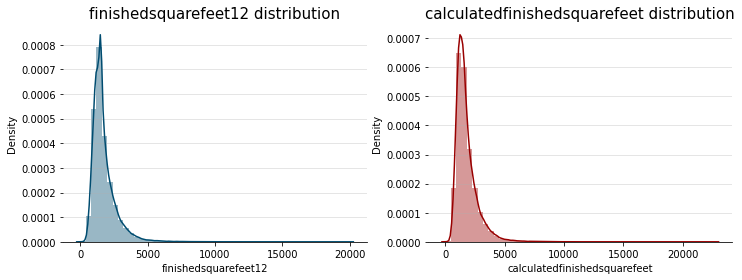

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
colors = ['#004c70', '#990000']

for i, col in enumerate(top2):
    sns.distplot(data[col], color = colors[i], ax = ax[i])
    ax[i].set_title(f'{col} distribution', fontsize = 15)

for s in ['top','left','right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)
ax[0].grid(axis='y', linestyle='-', alpha=0.4); ax[1].grid(axis='y', linestyle='-', alpha=0.4)

#### Room Type Variables

The next highly correlated variables to logerror are bedroomcnt, bathroomcnt, fullbathcnt, and calculatedbathnbr. Among those vairables, three of them have to do with bathrooms. To begin, lets look at bathroom variables and how they relate to one another. From the table below, we can see that these variables are very correlated with one another. To avoid a multicolinearity problem, we will remove either fullbathcnt or calculatedbathnbr variables in the feature engineering part. We will do these because these two variables perfectly overlap. 

In [40]:
bathroom = ['bathroomcnt','fullbathcnt','calculatedbathnbr']
data[bathroom] = data[bathroom].astype(int)
data[bathroom].corr()

,bathroomcnt,fullbathcnt,calculatedbathnbr
bathroomcnt,1.000000,0.973137,0.973725
fullbathcnt,0.973137,1.000000,0.999402
calculatedbathnbr,0.973725,0.999402,1.000000


Next, we will consider the bedroom variable with logerror. From the graphs below we can see that bedroomcnt ranges from 0 to 16.Most of residences have 2-4 bedrooms in total. As the number of rooms increases(if there are more than 8 rooms in home), mean logerror was larger than that of small numbe of bedrooms. This is because there are very few residences with more than 8 rooms, so it's hard to estimated house prices with small amount of data.

Text(0, 0.5, 'Count')

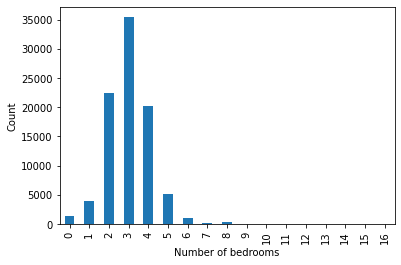

In [41]:
data['bedroomcnt'] = data['bedroomcnt'].astype(int)
data.groupby('bedroomcnt')['logerror'].count().plot.bar()
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')

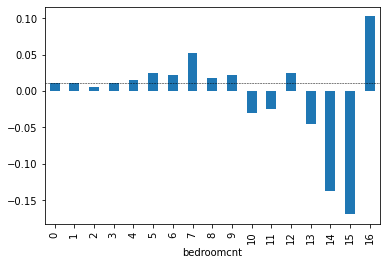

In [42]:
data.groupby('bedroomcnt')['logerror'].mean().plot.bar()
plt.axhline(data['logerror'].mean(), linestyle = '--', color = 'black', linewidth = 0.5)